In [52]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

import plotly.express as px
import plotly.io as pio


In [53]:
# Read data

df = pd.read_csv('forbes_2640_billionaires.csv', index_col = 2, header = 0)

In [54]:
# Basic Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2640 entries, bernard-arnault to inigo-zobel
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   rank                2640 non-null   int64  
 1   name                2640 non-null   object 
 2   net_worth           2640 non-null   float64
 3   age                 2575 non-null   float64
 4   age_range           2640 non-null   int64  
 5   country             2640 non-null   object 
 6   source              2640 non-null   object 
 7   industry            2640 non-null   object 
 8   Age                 2555 non-null   float64
 9   Source of Wealth    2639 non-null   object 
 10  Self-Made Score     558 non-null    float64
 11  Philanthropy Score  411 non-null    float64
 12  Residence           2581 non-null   object 
 13  Citizenship         2629 non-null   object 
 14  Marital Status      2089 non-null   object 
 15  Children            1598 non-null   flo

In [55]:
# Preview data

df.head()

,rank,name,net_worth,age,age_range,country,source,industry,Age,Source of Wealth,...,Residence,Citizenship,Marital Status,Children,Education,Bachelor,Master,Doctorate,Drop Out,Self Made
forbes_id,,,,,,,,,,,,,,,,,,,,,
bernard-arnault,1,Bernard Arnault & family,211.0,74.0,8,France,LVMH,Fashion & Retail,74.0,LVMH,...,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",1.0,0.0,0.0,0.0,0
elon-musk,2,Elon Musk,180.0,51.0,6,United States,"Tesla, SpaceX",Automotive,52.0,"Tesla, SpaceX, Self Made",...,"Austin, Texas",United States,Single,10.0,"Bachelor of Arts/Science, University of Pennsy...",1.0,0.0,0.0,0.0,1
jeff-bezos,3,Jeff Bezos,114.0,59.0,6,United States,Amazon,Technology,59.0,"Amazon, Self Made",...,"Medina, Washington",United States,Engaged,4.0,"Bachelor of Arts/Science, Princeton University",1.0,0.0,0.0,0.0,1
larry-ellison,4,Larry Ellison,107.0,78.0,8,United States,Oracle,Technology,79.0,"Oracle, Self Made",...,"Lanai, Hawaii",United States,In Relationship,4.0,"Drop Out, University of Chicago; Drop Out, Uni...",0.0,0.0,0.0,1.0,1
warren-buffett,5,Warren Buffett,106.0,92.0,10,United States,Berkshire Hathaway,Finance & Investments,92.0,"Berkshire Hathaway, Self Made",...,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,"Master of Science, Columbia University; Bachel...",1.0,1.0,0.0,0.0,1


In [56]:
# Rank and Name are not valuable for analysis.
# Source of Wealth is similar to Souce and is missing a value.
# Self-Made Score and Philanthropy Score are largly null without any description to be able to calculate them.
# age_range is undefined from the source.
# age was the age when the data was created. Age is the age on the Forbes profile. Keeping the Forbes defined age as it will most closely align with the other data from Forbes.
df.drop(columns=['rank','name','Source of Wealth','Self-Made Score','Philanthropy Score','Education','age_range','age'],inplace=True)

df

,net_worth,country,source,industry,Age,Residence,Citizenship,Marital Status,Children,Bachelor,Master,Doctorate,Drop Out,Self Made
forbes_id,,,,,,,,,,,,,,
bernard-arnault,211.0,France,LVMH,Fashion & Retail,74.0,"Paris, France",France,Married,5.0,1.0,0.0,0.0,0.0,0
elon-musk,180.0,United States,"Tesla, SpaceX",Automotive,52.0,"Austin, Texas",United States,Single,10.0,1.0,0.0,0.0,0.0,1
jeff-bezos,114.0,United States,Amazon,Technology,59.0,"Medina, Washington",United States,Engaged,4.0,1.0,0.0,0.0,0.0,1
larry-ellison,107.0,United States,Oracle,Technology,79.0,"Lanai, Hawaii",United States,In Relationship,4.0,0.0,0.0,0.0,1.0,1
warren-buffett,106.0,United States,Berkshire Hathaway,Finance & Investments,92.0,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yu-rong,1.0,China,Health clinics,Healthcare,51.0,"Shanghai, China",China,NaN,NaN,NaN,NaN,NaN,NaN,1
richard-yuengling-jr,1.0,United States,Beer,Food & Beverage,80.0,"Pottsville, Pennsylvania",United States,Divorced,4.0,0.0,0.0,0.0,1.0,0
zhang-gongyun,1.0,China,Tyre manufacturing machinery,Manufacturing,60.0,"Gaomi, China",China,NaN,NaN,NaN,NaN,NaN,NaN,1


<Axes: >

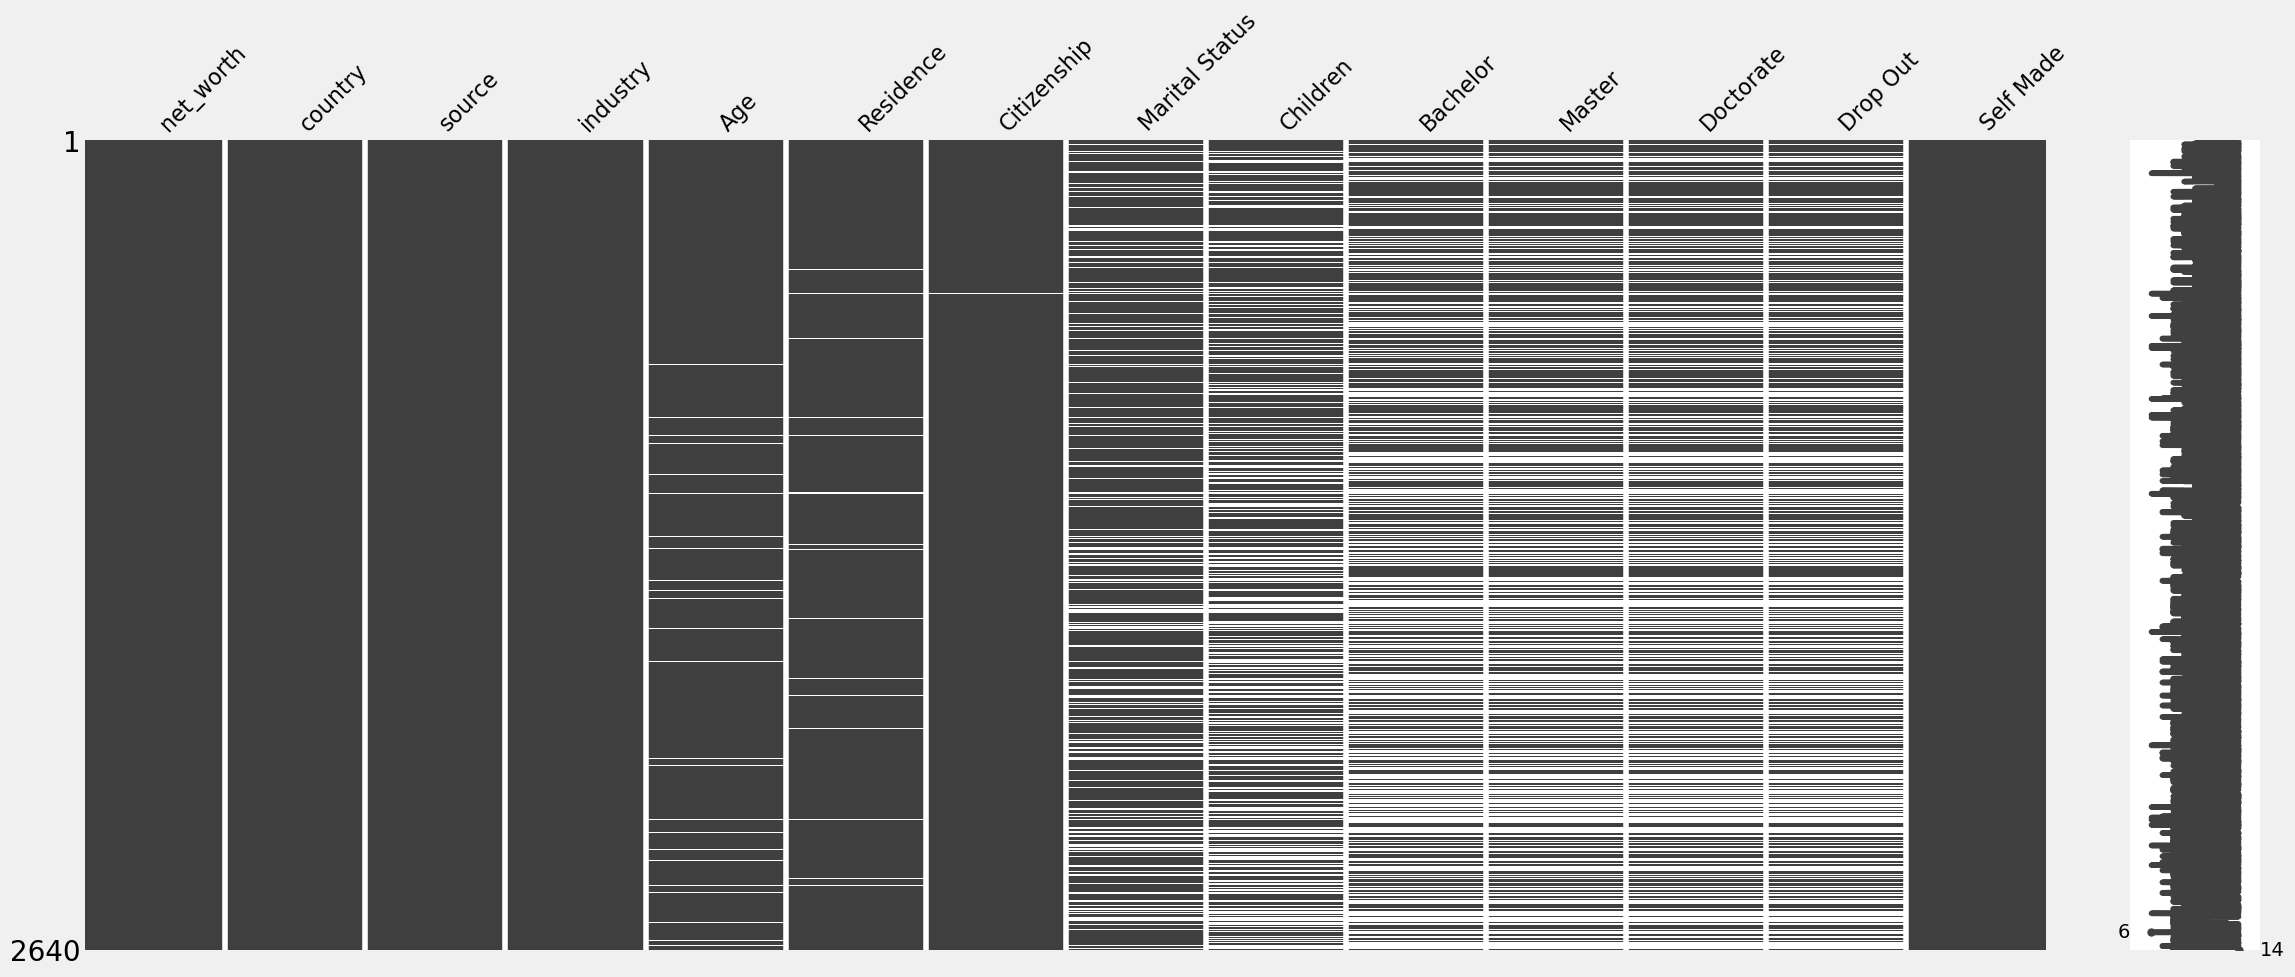

In [57]:
# Visualize missing values
import missingno as msno
msno.matrix(df)

In [58]:
df[df['Residence'].isnull()].head()

,net_worth,country,source,industry,Age,Residence,Citizenship,Marital Status,Children,Bachelor,Master,Doctorate,Drop Out,Self Made
forbes_id,,,,,,,,,,,,,,
beate-heister,15.8,Germany,Supermarkets,Fashion & Retail,NaN,NaN,Germany,NaN,NaN,NaN,NaN,NaN,NaN,0
silvio-berlusconi,6.8,Italy,Media,Diversified,NaN,NaN,Italy,NaN,5.0,0.0,0.0,0.0,0.0,1
gordon-moore,6.8,United States,Intel,Technology,NaN,NaN,United States,NaN,2.0,1.0,0.0,1.0,0.0,1
sunil-mittal-1,6.1,India,Telecom,Telecom,65.0,NaN,India,Married,3.0,NaN,NaN,NaN,NaN,1
douglas-leone,5.3,United States,Venture capital,Finance & Investments,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [59]:
df.isnull().sum()

net_worth            0
country              0
source               0
industry             0
Age                 85
Residence           59
Citizenship         11
Marital Status     551
Children          1042
Bachelor          1224
Master            1224
Doctorate         1224
Drop Out          1224
Self Made            0
dtype: int64

In [60]:
#Finding the mean of the column having NaN 
mean_value=df['Age'].mean() 

# Replace NaNs in column Age with the 
# mean of values in the same column 
df['Age'].fillna(value=mean_value, inplace=True)

df.head()

,net_worth,country,source,industry,Age,Residence,Citizenship,Marital Status,Children,Bachelor,Master,Doctorate,Drop Out,Self Made
forbes_id,,,,,,,,,,,,,,
bernard-arnault,211.0,France,LVMH,Fashion & Retail,74.0,"Paris, France",France,Married,5.0,1.0,0.0,0.0,0.0,0
elon-musk,180.0,United States,"Tesla, SpaceX",Automotive,52.0,"Austin, Texas",United States,Single,10.0,1.0,0.0,0.0,0.0,1
jeff-bezos,114.0,United States,Amazon,Technology,59.0,"Medina, Washington",United States,Engaged,4.0,1.0,0.0,0.0,0.0,1
larry-ellison,107.0,United States,Oracle,Technology,79.0,"Lanai, Hawaii",United States,In Relationship,4.0,0.0,0.0,0.0,1.0,1
warren-buffett,106.0,United States,Berkshire Hathaway,Finance & Investments,92.0,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,1.0,1.0,0.0,0.0,1


In [61]:
# Replace NaNs in column Citizenship with the 
# country of work. 
df['Citizenship'].fillna(value=df['country'], inplace=True)
df['Marital Status'].fillna(value='Unknown', inplace=True)
df['Residence'].fillna(value=df['country'], inplace=True)
df['Children'].fillna(value=0, inplace=True)
df['Bachelor'].fillna(value=0, inplace=True)
df['Master'].fillna(value=0, inplace=True)
df['Doctorate'].fillna(value=0, inplace=True)
df['Drop Out'].fillna(value=0, inplace=True)

In [62]:
display(df.isnull().sum())
df.head()

net_worth         0
country           0
source            0
industry          0
Age               0
Residence         0
Citizenship       0
Marital Status    0
Children          0
Bachelor          0
Master            0
Doctorate         0
Drop Out          0
Self Made         0
dtype: int64

,net_worth,country,source,industry,Age,Residence,Citizenship,Marital Status,Children,Bachelor,Master,Doctorate,Drop Out,Self Made
forbes_id,,,,,,,,,,,,,,
bernard-arnault,211.0,France,LVMH,Fashion & Retail,74.0,"Paris, France",France,Married,5.0,1.0,0.0,0.0,0.0,0
elon-musk,180.0,United States,"Tesla, SpaceX",Automotive,52.0,"Austin, Texas",United States,Single,10.0,1.0,0.0,0.0,0.0,1
jeff-bezos,114.0,United States,Amazon,Technology,59.0,"Medina, Washington",United States,Engaged,4.0,1.0,0.0,0.0,0.0,1
larry-ellison,107.0,United States,Oracle,Technology,79.0,"Lanai, Hawaii",United States,In Relationship,4.0,0.0,0.0,0.0,1.0,1
warren-buffett,106.0,United States,Berkshire Hathaway,Finance & Investments,92.0,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,1.0,1.0,0.0,0.0,1


In [63]:
df.groupby(['Children'])['Children'].count()

Children
0.0     1042
1.0      180
2.0      534
3.0      459
4.0      232
5.0      106
6.0       39
7.0       23
8.0        8
9.0        3
10.0       8
11.0       2
14.0       1
15.0       1
22.0       1
23.0       1
Name: Children, dtype: int64

In [68]:
df.groupby(['Residence'])['Residence'].count().sort_values()

Residence
A Coruña, Spain             1
Aarhus, Denmark             1
Abbeville, Alabama          1
Aberdeen, United Kingdom    1
Aberdyfi, United Kingdom    1
                           ..
Zug, Switzerland            6
Zurich, Switzerland         9
error                       1
foshan, China               1
torino, Italy               1
Name: Residence, Length: 780, dtype: int64

In [73]:
# df['Residence'].str.replace('error',df['Citizenship'])
df['Residence'][df['Residence'] == 'error'] = 'Taiwan'
df[df['Residence'] == 'error']

,net_worth,country,source,industry,Age,Residence,Citizenship,Marital Status,Children,Bachelor,Master,Doctorate,Drop Out,Self Made
forbes_id,,,,,,,,,,,,,,


In [74]:
df.head()

,net_worth,country,source,industry,Age,Residence,Citizenship,Marital Status,Children,Bachelor,Master,Doctorate,Drop Out,Self Made
forbes_id,,,,,,,,,,,,,,
bernard-arnault,211.0,France,LVMH,Fashion & Retail,74.0,"Paris, France",France,Married,5.0,1.0,0.0,0.0,0.0,0
elon-musk,180.0,United States,"Tesla, SpaceX",Automotive,52.0,"Austin, Texas",United States,Single,10.0,1.0,0.0,0.0,0.0,1
jeff-bezos,114.0,United States,Amazon,Technology,59.0,"Medina, Washington",United States,Engaged,4.0,1.0,0.0,0.0,0.0,1
larry-ellison,107.0,United States,Oracle,Technology,79.0,"Lanai, Hawaii",United States,In Relationship,4.0,0.0,0.0,0.0,1.0,1
warren-buffett,106.0,United States,Berkshire Hathaway,Finance & Investments,92.0,"Omaha, Nebraska",United States,"Widowed, Remarried",3.0,1.0,1.0,0.0,0.0,1
